In [164]:
#This is Joe's exploratory scratch workb

In [165]:
!pip install descartes

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# import geopandas as geo
# import descartes as des

#from shapely.geometry import Point, Polygon
%matplotlib inline


In [167]:
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/houston-ds-042219-mod1-project/master/kc_house_data.csv')




In [168]:
!pwd

/Users/josephdown/mod1-project


In [169]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [170]:
df.describe

<bound method NDFrame.describe of                id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014   221900.0         3       1.00         1180   
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
2      5631500400   2/25/2015   180000.0         2       1.00          770   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
7      2008000270   1/15/2015   291850.0         3       1.50         1060   
8      2414600126   4/15/2015   229500.0         3       1.00         1780   
9      3793500160   3/12/2015   323000.0         3       2.50         1890   
10     1736800520    4/3/2015   662500.0         3       2.50         3560   
11     9212900260   5/27/2014 

In [171]:
df.shape

(21597, 21)

In [172]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [173]:
by_zipcode = df.groupby('zipcode')['price'].describe()

In [174]:
by_zipcode['zipcode']= by_zipcode.index

In [175]:
by_zipcode.head()

,count,mean,std,min,25%,50%,75%,max,zipcode
zipcode,,,,,,,,,
98001,361.0,2.811949e+05,98837.430520,100000.0,215000.0,260000.0,320000.0,850000.0,98001
98002,199.0,2.342840e+05,52041.448659,95000.0,199975.0,235000.0,268500.0,389000.0,98002
98003,280.0,2.941113e+05,107597.662236,128000.0,229000.0,267475.0,330000.0,950000.0,98003
98004,317.0,1.356524e+06,746094.067159,425000.0,845000.0,1150000.0,1690000.0,7060000.0,98004
98005,168.0,8.102897e+05,268979.168276,400000.0,637775.0,765475.0,911250.0,1960000.0,98005


In [176]:
by_zipcode.sort_values('mean', ascending=False, inplace = True)

In [177]:
by_zipcode.set_index('mean', inplace=True)

In [178]:
by_zipcode.head()

,count,std,min,25%,50%,75%,max,zipcode
mean,,,,,,,,
2.161300e+06,50.0,1.166904e+06,787500.0,1402500.0,1895000.0,2560000.0,6890000.0,98039
1.356524e+06,317.0,7.460941e+05,425000.0,845000.0,1150000.0,1690000.0,7060000.0,98004
1.194874e+06,282.0,6.077676e+05,500000.0,822000.0,993750.0,1387500.0,5300000.0,98040
1.096239e+06,269.0,5.942232e+05,169317.0,680000.0,915000.0,1330000.0,3400000.0,98112
8.996077e+05,104.0,7.903814e+05,330000.0,571875.0,710000.0,976175.0,7700000.0,98102


In [179]:
by_zipcode['mean']=by_zipcode.index

In [180]:
by_zipcode.head(10)

,count,std,min,25%,50%,75%,max,zipcode,mean
mean,,,,,,,,,
2.161300e+06,50.0,1.166904e+06,787500.0,1402500.0,1895000.0,2560000.0,6890000.0,98039,2.161300e+06
1.356524e+06,317.0,7.460941e+05,425000.0,845000.0,1150000.0,1690000.0,7060000.0,98004,1.356524e+06
1.194874e+06,282.0,6.077676e+05,500000.0,822000.0,993750.0,1387500.0,5300000.0,98040,1.194874e+06
1.096239e+06,269.0,5.942232e+05,169317.0,680000.0,915000.0,1330000.0,3400000.0,98112,1.096239e+06
8.996077e+05,104.0,7.903814e+05,330000.0,571875.0,710000.0,976175.0,7700000.0,98102,8.996077e+05
8.800778e+05,109.0,4.557008e+05,216650.0,620000.0,736000.0,1000000.0,3200000.0,98109,8.800778e+05
8.632289e+05,229.0,4.778332e+05,380000.0,550000.0,675000.0,1010000.0,3650000.0,98105,8.632289e+05
8.599386e+05,498.0,4.462724e+05,247500.0,575625.0,760184.5,977250.0,4210000.0,98006,8.599386e+05
8.497148e+05,184.0,4.340608e+05,300523.0,598750.0,744975.0,937750.0,3070000.0,98119,8.497148e+05


In [181]:
by_zipcode['zipcode_copy'] = by_zipcode['zipcode'].map(lambda x: '#{:d}'.format(x))

In [182]:
by_zipcode.sort_values('mean', inplace=True)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'mean' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Top 25 Zipcodes by Home Value')

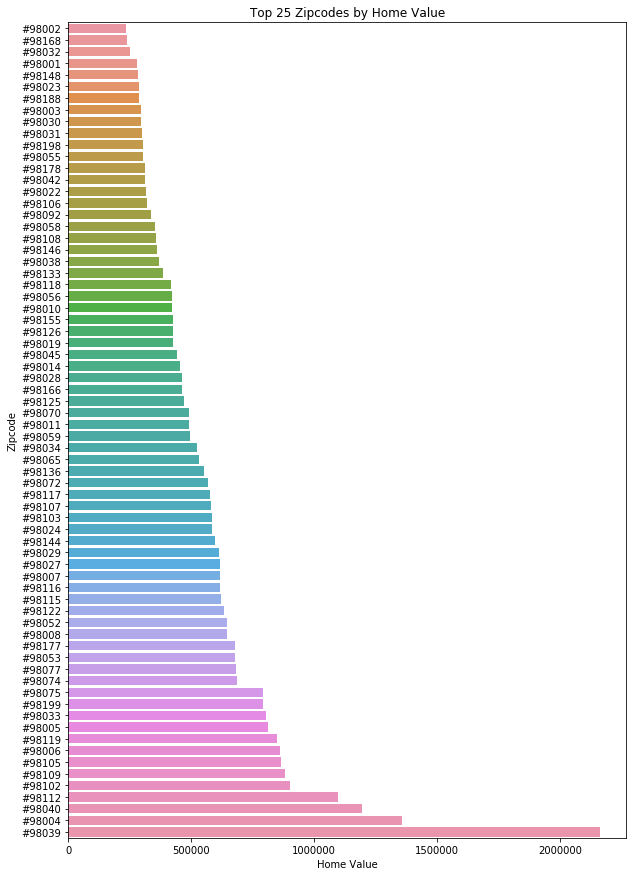

In [183]:
fig,ax = plt.subplots(figsize=(10,15))
sns.barplot(x='mean', y='zipcode_copy', data=by_zipcode[-25:], ax=ax, orient='h')
ax.set_xlabel('Home Value')
ax.set_ylabel('Zipcode')
ax.set_title('Top 25 Zipcodes by Home Value')

# a4_dims = (11.7, 8.27)
# df = mylib.load_data()
# fig, ax = pyplot.subplots(figsize=a4_dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)

In [184]:
by_zipcode.tail(25)

,count,std,min,25%,50%,75%,max,zipcode,mean,zipcode_copy
mean,,,,,,,,,,
6.126427e+05,321.0,2.153901e+05,285000.0,485000.0,575000.0,690000.0,2200000.0,98029,6.126427e+05,#98029
6.170540e+05,412.0,2.910077e+05,130000.0,450000.0,570500.0,715375.0,2700000.0,98027,6.170540e+05,#98027
6.172540e+05,141.0,2.003780e+05,295000.0,465000.0,555000.0,730000.0,1320000.0,98007,6.172540e+05,#98007
6.186951e+05,330.0,2.519461e+05,130000.0,460000.0,562750.0,699750.0,2050000.0,98116,6.186951e+05,#98116
6.199441e+05,583.0,2.375054e+05,200000.0,456750.0,567000.0,719000.0,2300000.0,98115,6.199441e+05,#98115
6.345581e+05,290.0,2.854355e+05,202000.0,451000.0,572000.0,718750.0,2050000.0,98122,6.345581e+05,#98122
6.452442e+05,574.0,1.975535e+05,225000.0,509437.5,615000.0,751000.0,2200000.0,98052,6.452442e+05,#98052
6.456282e+05,283.0,4.218750e+05,250000.0,465375.0,545000.0,658500.0,3570000.0,98008,6.456282e+05,#98008
6.764194e+05,255.0,4.363797e+05,245560.0,428500.0,554000.0,739475.0,3800000.0,98177,6.764194e+05,#98177


Text(0.5, 1.0, 'Bottom 25 Zipcodes by Home Value')

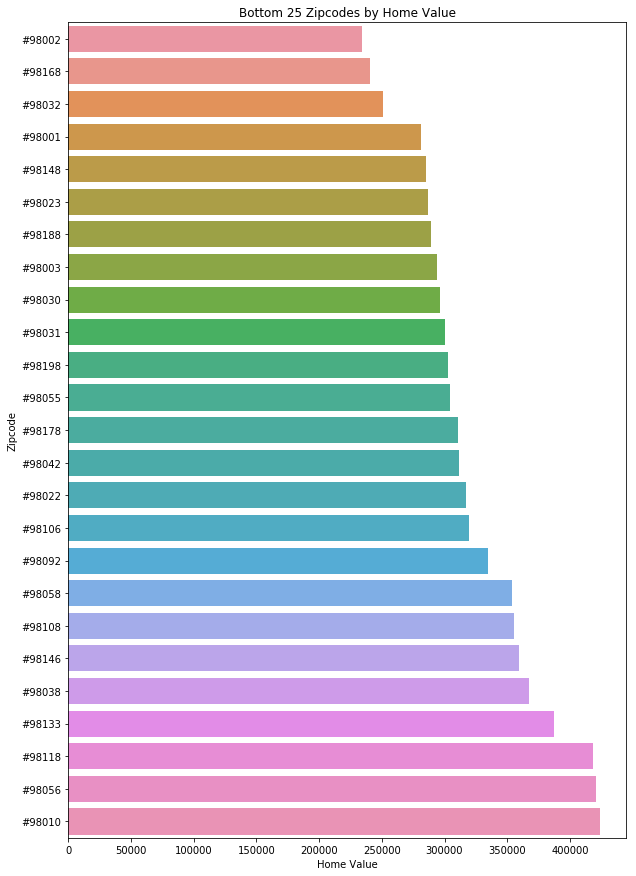

In [185]:
fig,ax = plt.subplots(figsize=(10,15))
sns.barplot(x='mean', y='zipcode_copy', data=by_zipcode.head(25), ax=ax, orient='h')
ax.set_xlabel('Home Value')
ax.set_ylabel('Zipcode')
ax.set_title('Bottom 25 Zipcodes by Home Value')

In [186]:
df.size

453537

In [187]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [188]:
df.waterfront.mean()


0.007595858696217679

In [189]:
#df.dtypes


In [190]:
housing_values = df


In [191]:
housing_values.waterfront.fillna(0, inplace= True)
                                

In [192]:
housing_values.view.median()

0.0

In [193]:
housing_values.view.fillna(housing_values.view.median(), inplace=True)

In [194]:
housing_values.yr_renovated.mean()

83.6367783722895

In [195]:
housing_values.yr_renovated.median()

0.0

In [196]:
housing_values.yr_renovated.fillna(housing_values.yr_renovated.median(), inplace=True)

In [197]:
housing_values.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [198]:
#df.isna().sum()

In [199]:
housing_values.sqft_basement.replace('?','0',inplace=True)

In [200]:
housing_values.sqft_basement = pd.to_numeric(housing_values.sqft_basement)

In [201]:
# f, axes = plt.subplots(4, 5)

# for x, column in enumerate(housing_values.drop(['id','date'], axis=1).columns):
#     sns.distplot(housing_values[column], ax=axes[x//4,x%3])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


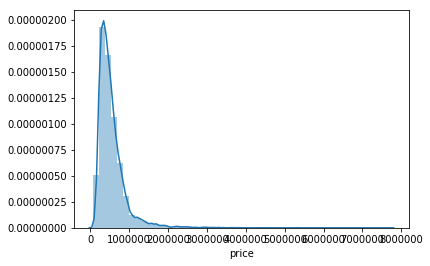

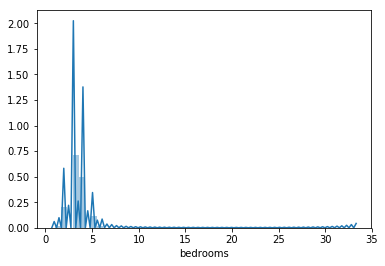

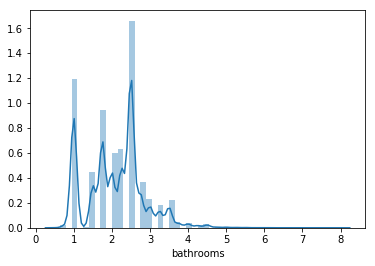

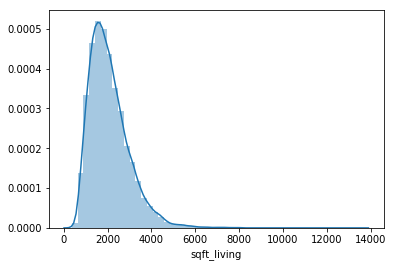

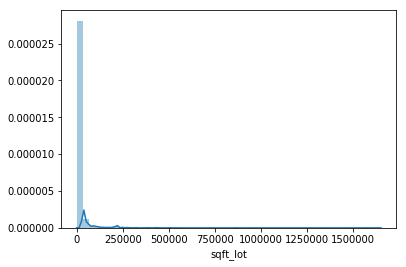

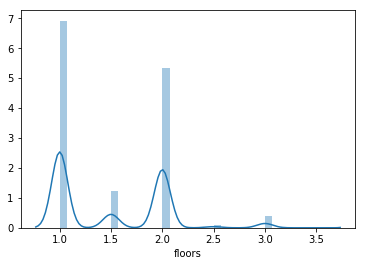

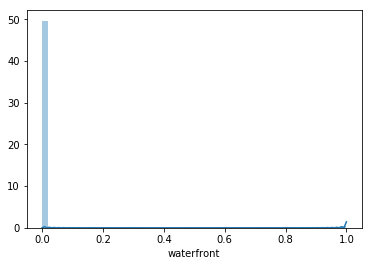

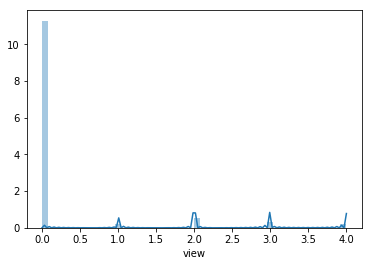

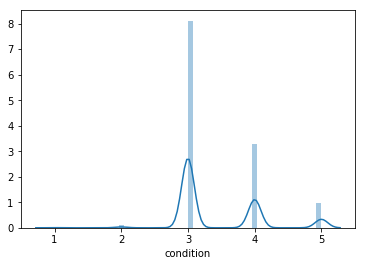

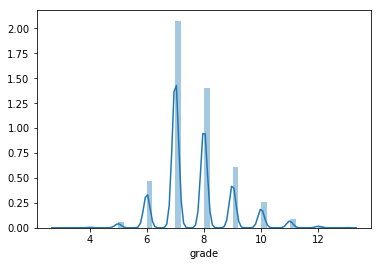

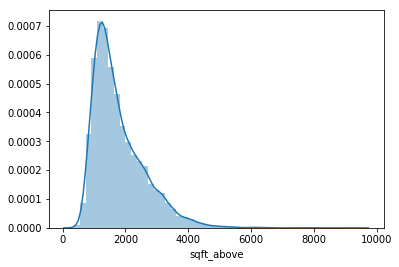

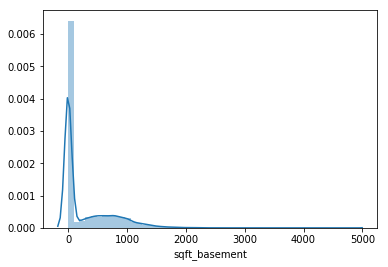

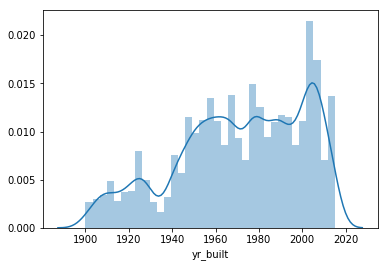

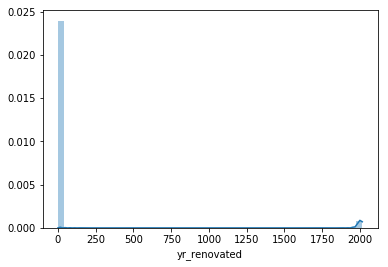

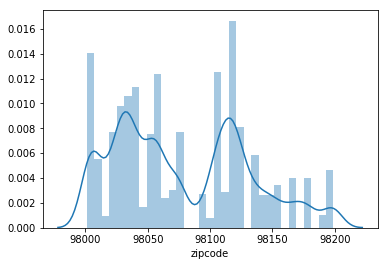

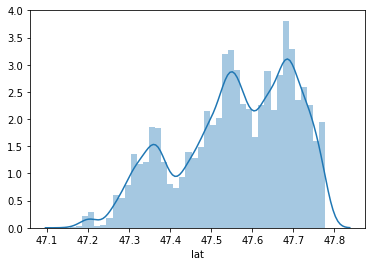

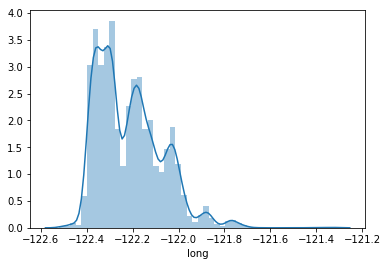

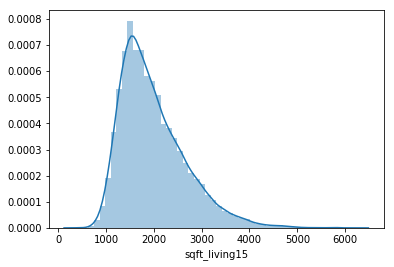

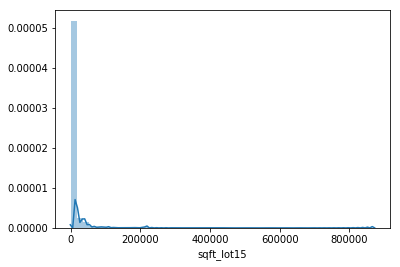

In [202]:
for column in housing_values.drop(['id','date'], axis=1).columns:
     sns.distplot(housing_values[column])
     plt.show()

In [203]:
pairplot_df = df.drop(['id','date'],axis=1)
 


In [204]:
pairplot_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


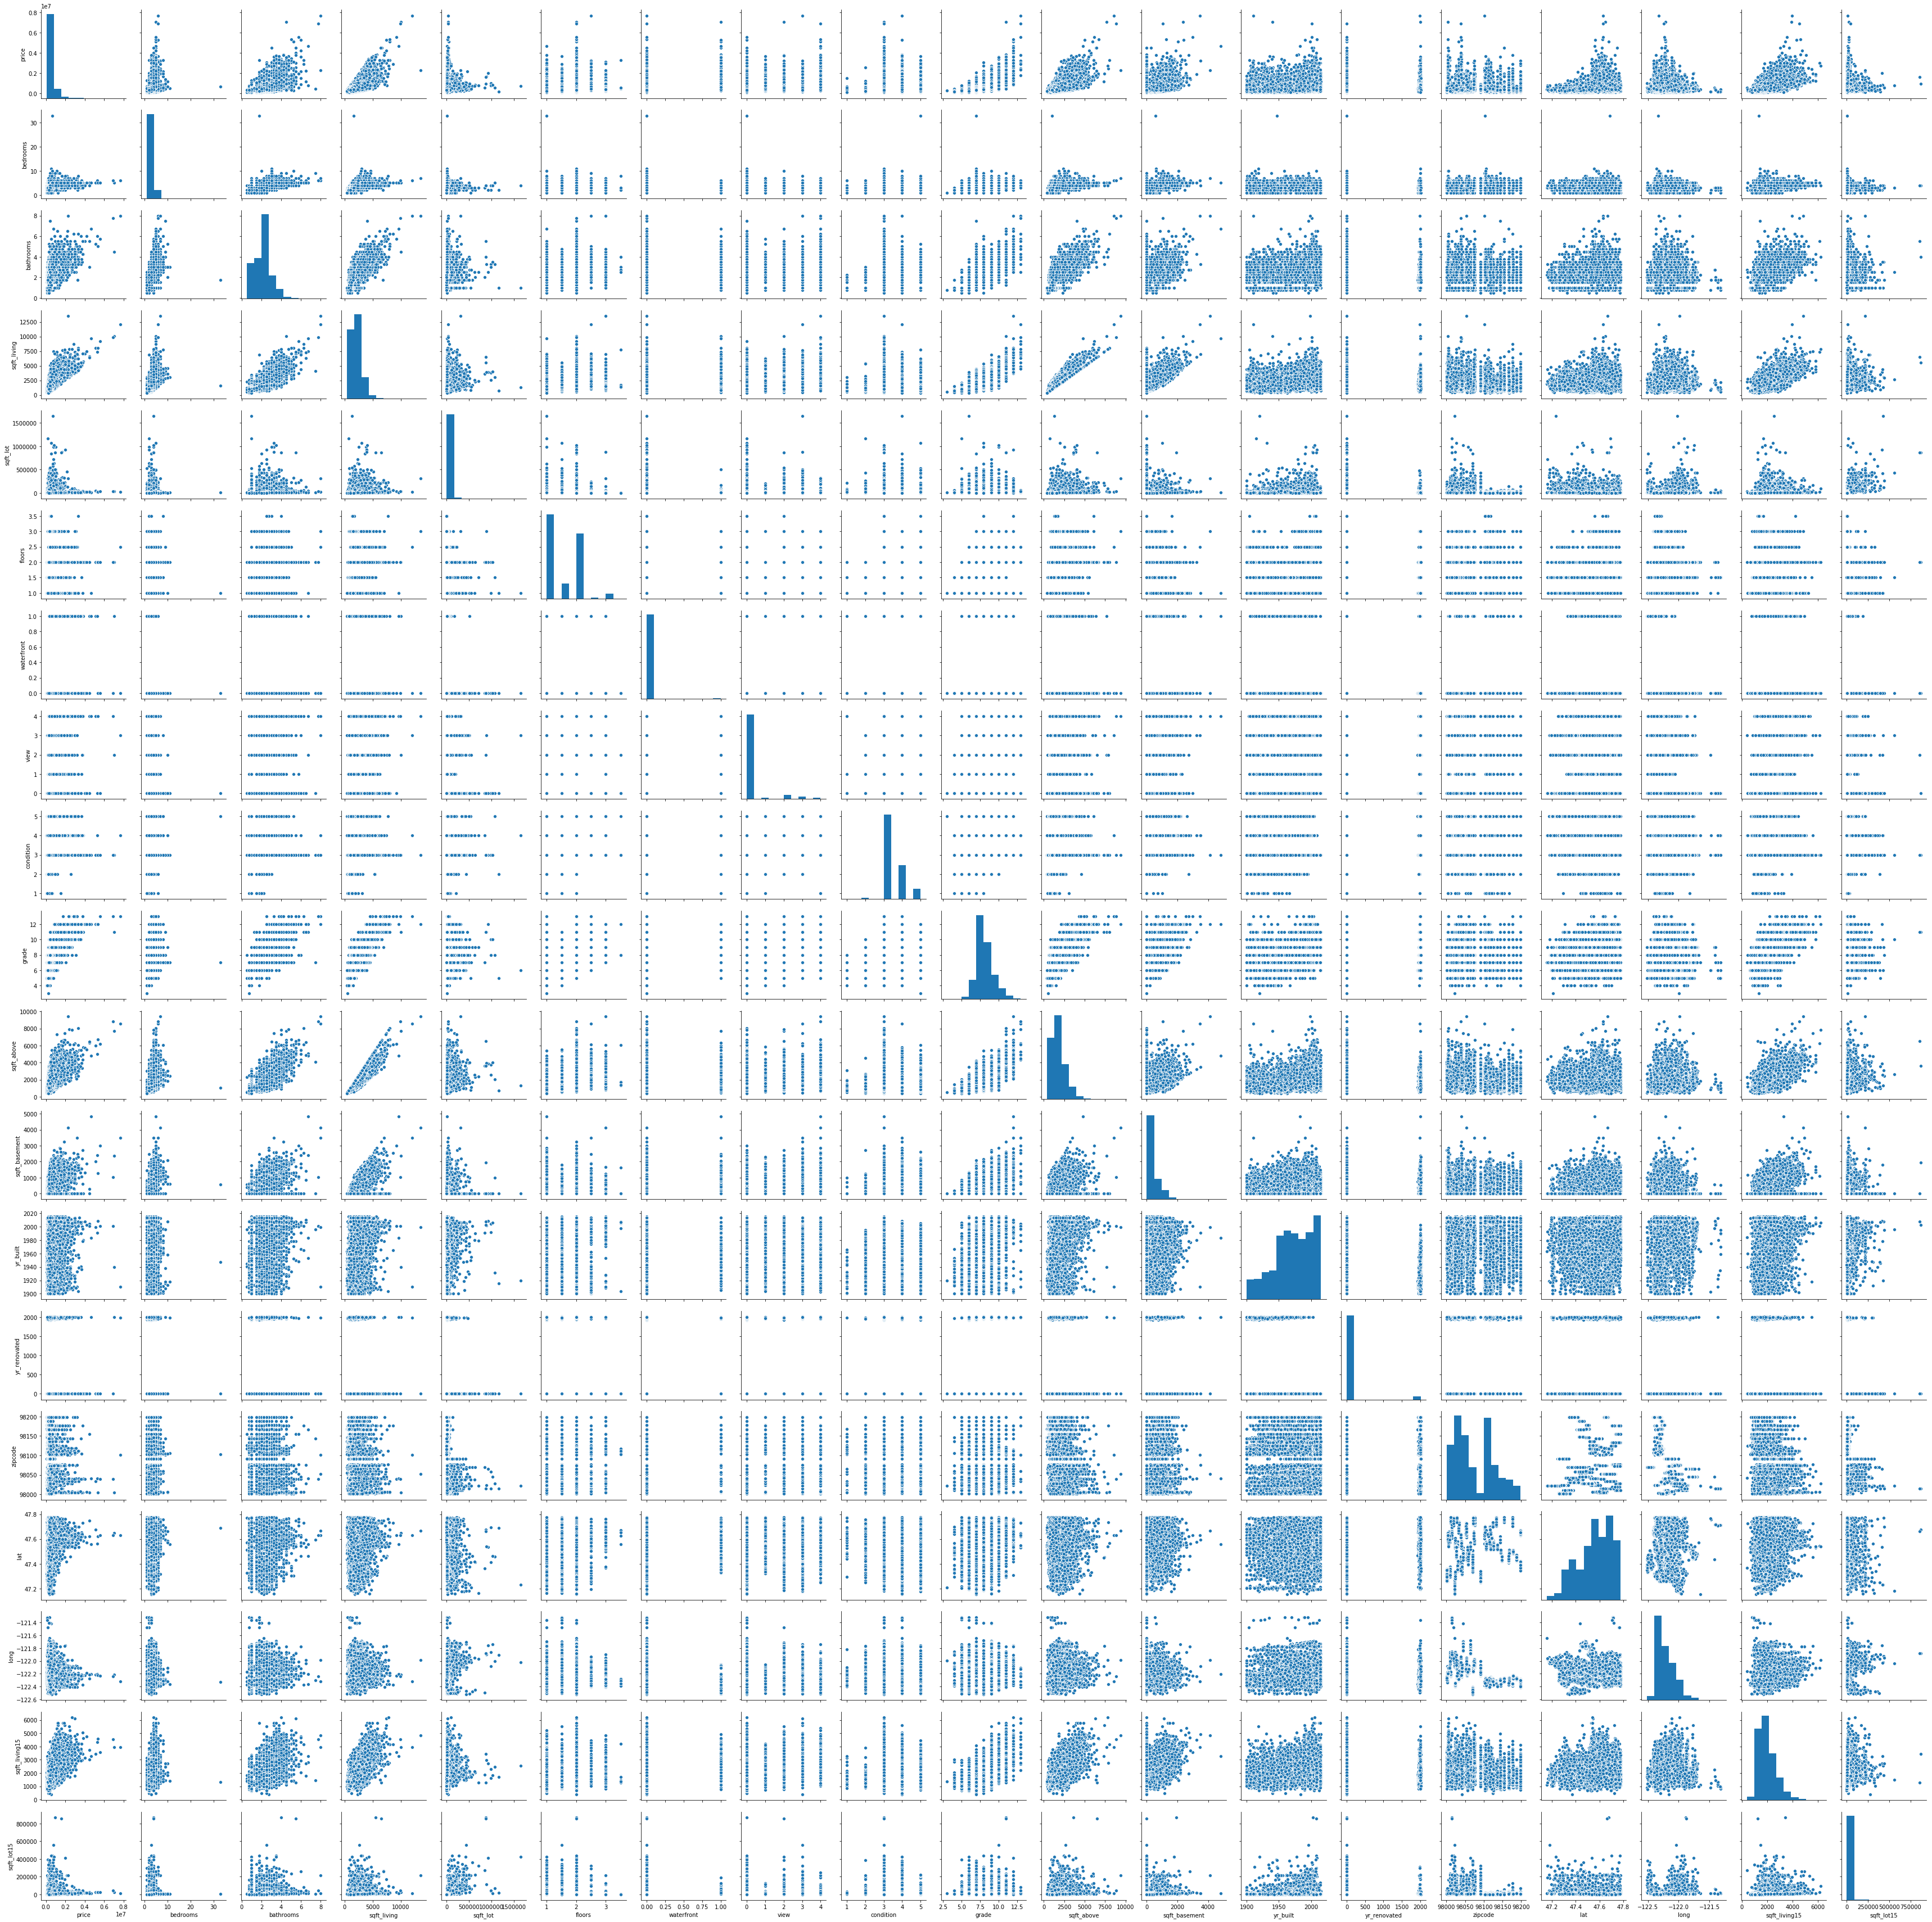

In [205]:
sns.pairplot(pairplot_df)

In [206]:
housing_values.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [207]:
import numpy as np

In [218]:
np.sqrt(np.mean((predictions-y)**2))



233392.86216062278

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


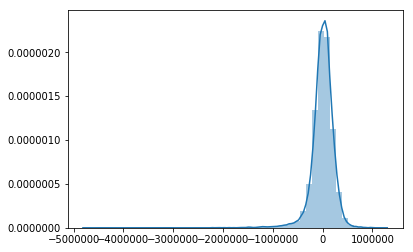

In [209]:
sns.distplot(predictions-y)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


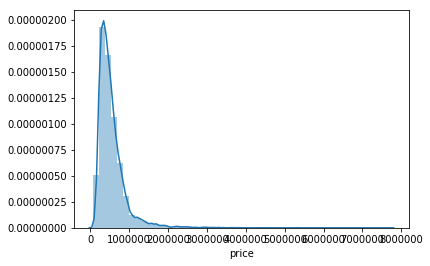

In [210]:
sns.distplot(y)

In [217]:
X = housing_values.drop(['id','date','price','view','floors','condition','yr_renovated','zipcode','lat','long'],axis=1)
y = housing_values.price
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 1.230e+04
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        17:04:10   Log-Likelihood:            -2.9759e+05
No. Observations:               21597   AIC:                         5.952e+05
Df Residuals:                   21585   BIC:                         5.953e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bedrooms          -3.077e+04   2174.363    -14.152      0.000    -3.5e+04   -2.65e+04
bathrooms         -2.044e+04   3293.488     -6.207      0.000   -2.69e+04    -1.4e+04
sqft_living         198.0671     20.827      9.510      0.000     157.244     238.890
sqft_lot              0.0686      0.055      1.241      0.215      -0.040       0.177
waterfront         8.144e+05   1.96e+04     41.599      0.000    7.76e+05    8.53e+05
grade              1.157e+05   2397.896     48.250      0.000    1.11e+05     1.2e+05
sqft_above          -25.7649     20.752     -1.242      0.214     -66.440      14.911
sqft_basement        44.1498     20.766      2.126      0.034       3.446      84.854
yr_built           -316.5241      7.546    -41.948      0.000    -331.314    -301.734
sqft_living15        23.5155      3.811      6.170      0.000      16.045      30.986
sqft_lot15           -0.7000      0.085     -8.278      0.000      -0.866      -0.534
recent_renovation  1.535e+05   1.72e+04      8.904      0.000     1.2e+05    1.87e+05
==============================================================================
Omnibus:                    15599.162   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           911680.138
Skew:                           2.891   Prob(JB):                         0.00
Kurtosis:                      34.300   Cond. No.                     6.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [212]:
housing_values.yr_renovated.mean()


68.75820715840163

In [213]:
housing_values.loc[housing_values.yr_renovated>0]['yr_renovated'].describe()
        

count     744.000000
mean     1995.928763
std        15.599946
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.250000
max      2015.000000
Name: yr_renovated, dtype: float64

In [214]:
recent_renovation = [0]*len(housing_values['yr_renovated'])
for index, house in enumerate(housing_values['yr_renovated']):
    if house > 2007.0:
        recent_renovation[index]=1
    else:
        recent_renovation[index]=0


In [215]:
housing_values['recent_renovation'] = recent_renovation
housing_values

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,recent_renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,0
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0


In [216]:
X = housing_values.drop(['id','date','price','view','floors','condition','yr_renovated','zipcode','lat','long'],axis=1)
y = housing_values.price
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 1.230e+04
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        16:47:07   Log-Likelihood:            -2.9759e+05
No. Observations:               21597   AIC:                         5.952e+05
Df Residuals:                   21585   BIC:                         5.953e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bedrooms          -3.077e+04   2174.363    -14.152      0.000    -3.5e+04   -2.65e+04
bathrooms         -2.044e+04   3293.488     -6.207      0.000   -2.69e+04    -1.4e+04
sqft_living         198.0671     20.827      9.510      0.000     157.244     238.890
sqft_lot              0.0686      0.055      1.241      0.215      -0.040       0.177
waterfront         8.144e+05   1.96e+04     41.599      0.000    7.76e+05    8.53e+05
grade              1.157e+05   2397.896     48.250      0.000    1.11e+05     1.2e+05
sqft_above          -25.7649     20.752     -1.242      0.214     -66.440      14.911
sqft_basement        44.1498     20.766      2.126      0.034       3.446      84.854
yr_built           -316.5241      7.546    -41.948      0.000    -331.314    -301.734
sqft_living15        23.5155      3.811      6.170      0.000      16.045      30.986
sqft_lot15           -0.7000      0.085     -8.278      0.000      -0.866      -0.534
recent_renovation  1.535e+05   1.72e+04      8.904      0.000     1.2e+05    1.87e+05
==============================================================================
Omnibus:                    15599.162   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           911680.138
Skew:                           2.891   Prob(JB):                         0.00
Kurtosis:                      34.300   Cond. No.                     6.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""